# Solución del sistema de ecuaciones para mecanismo manivela balancín por método analítico

Norton, R. L., & Hernández, A. E. G. (2000). Diseño de maquinaria. McGraw-Hill Interamericana. https://books.google.com.co/books?id=9LhYAAAACAAJ

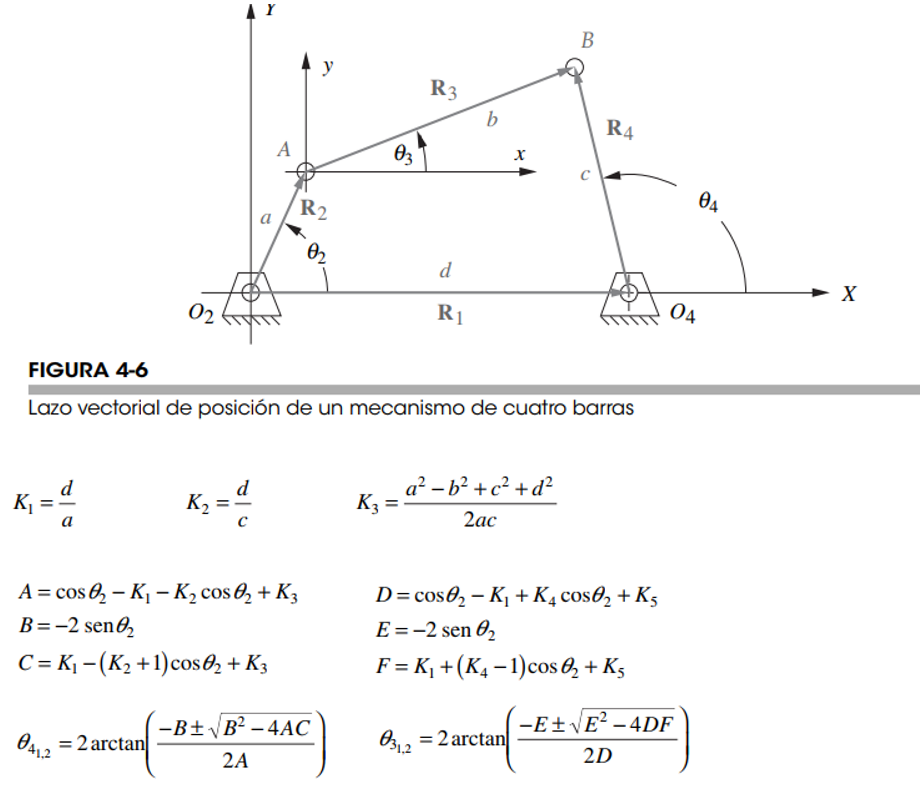

## Ecuación de cierre vectorial

$\overrightarrow{r_{2}}+\overrightarrow{r_{3}}-\overrightarrow{r_{4}}-\overrightarrow{r_{1}}=0$

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})+r3\cdot cos(\theta_{3})-r4\cdot cos(\theta_{4})-r1\cdot cos(\theta_{1})=0$,

$r2\cdot sin(\theta_{2})+r3\cdot sin(\theta_{3})-r4\cdot sin(\theta_{4})-r1\cdot sin(\theta_{1})=0$

## Solución analítica

Ver Norton, 2000

### 1. Importar módulos necesarios

Numpy para herramientas matemáticas

matplotlib.pyplot para gráficos

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### 2. definir parámetros

In [15]:
r2 = 60.0
r3 = 150.0
r4 = 100.0
r1 = 160.0 
th1 = 0.0

### 3. definir valor para variable de entrada

In [16]:
th2 = np.deg2rad(0)

### 4. implementar ecuaciones

In [17]:
k1 = r1/r2
k2 = r1/r4
k3 = ((r2**2)-(r3**2)+(r4**2)+(r1**2))/(2*r2*r4)

A = k3 - k2*np.cos(th2) - k1 + np.cos(th2)
B = -2*np.sin(th2)
C = k3 - k2*np.cos(th2) + k1 - np.cos(th2)

print(B,A,C)

-0.0 -1.875 1.458333333333333


### 5. evaluar

In [18]:
Bsquared = (B**2)
ACfour = (4*A*C)
print(Bsquared,ACfour)

0.0 -10.937499999999998


In [19]:
root = np.sqrt(Bsquared - ACfour)
print(root)
th4a = 2*np.arctan((-B+root)/(2*A))
th4b = 2*np.arctan((-B-root)/(2*A))
print(np.rad2deg(th4a),np.rad2deg(th4b))

3.307189138830738
-82.81924421854171 82.81924421854171


Nos quedamos con la solución $\theta_{4b}$

Ahora calculamos $\theta_{3}$

In [20]:
th3a = np.arccos((r1+r4*np.cos(th4a)-r2*np.cos(th2))/r3)
th3b = -np.arccos((r1+r4*np.cos(th4a)-r2*np.cos(th2))/r3)
print(np.rad2deg(th3a),np.rad2deg(th3b))

41.40962210927086 -41.40962210927086


### 6. resolver para un rango de posiciones de la barra de entrada

Ahora hagámoslo iterativo. Para hacer esto conviene hacer una función:
- La función recibe el ángulo $\theta_2$
- La función entrega ambos valores de $\theta_3$ y $\theta_4$

In [21]:
def manivelaBalancinAnalitico(th2):
    k1 = r1/r2
    k2 = r1/r4
    k3 = ((r2**2)-(r3**2)+(r4**2)+(r1**2))/(2*r2*r4)

    A = k3 - k2*np.cos(th2) - k1 + np.cos(th2)
    B = -2*np.sin(th2)
    C = k3 - k2*np.cos(th2) + k1 - np.cos(th2)
    
    Bsquared = (B**2)
    ACfour = (4*A*C)
    root = np.sqrt(Bsquared - ACfour)
    th4a = 2*np.arctan((-B+root)/(2*A))
    th4b = 2*np.arctan((-B-root)/(2*A))
    th3a = np.arccos((r1+r4*np.cos(th4a)-r2*np.cos(th2))/r3)
    th3b = np.arccos((r1+r4*np.cos(th4b)-r2*np.cos(th2))/r3)
    return [th4a,th4b,th3a,th3b]
    

Ahora probemos la función. Deberíamos obtener lo mismo que con la evaluación de arriba

In [22]:
varSecundarias = manivelaBalancinAnalitico(th2)
print(np.rad2deg(varSecundarias))

[-82.81924422  82.81924422  41.40962211  41.40962211]


Perfecto, ahora que la función trabaja bien, llamemos a esta función en un ciclo para resolver para muchas posiciones de la manivela.

In [23]:
#Numero de iteraciones
numpos = 50

#theta 2 vector
th2_v = np.linspace(0,2*np.pi,numpos)
th4_v = np.zeros(numpos)
th3_v = np.zeros(numpos)

for i in range(0,numpos):
    varSecundarias = manivelaBalancinAnalitico(th2_v[i])
    th4_v[i] = varSecundarias[1]
    th3_v[i] = varSecundarias[3]
    
print(np.rad2deg(th3_v),np.rad2deg(th4_v))


[41.40962211 37.09798365 33.10948483 29.57042515 26.52315973 23.95144303
 21.80851461 20.03776595 18.58452092 17.40132581 16.44952545 15.69908113
 15.12774084 14.72010751 14.46683588 14.36402744 14.41281179 14.61905368
 14.99308179 15.5492857  16.3053737  17.28105113 18.4959185  19.96656778
 21.70319643 23.70645307 25.96541552 28.45734157 31.149183   34.00020225
 36.9647704  39.99460979 43.04013715 46.05090257 48.97529854 51.75975682
 54.34763041 56.67793308 58.68412051 60.29317064 61.42538399 61.99560298
 61.9169473  61.10859575 59.50929422 57.09738175 53.9150301  50.08849403
 45.83013042 41.40962211] [ 82.81924422  78.96073034  76.30110719  74.88396386  74.637675
  75.42287899  77.07616758  79.43829465  82.36757275  85.7435865
  89.46594404  93.45105929  97.62850266 101.93757516 106.32431212
 110.73893095 115.13368096 119.46106878 123.67249134 127.71739639
 131.54318907 135.09617216 138.32376701 141.17801278 143.61984846
 145.6231051  147.17686051 148.28519008 148.96430403 149.238017

Ahora grafiquemos las variables secundarias Vs la principal.
Para esto necesitamos importar el módulo Matplotlib:

In [24]:
import matplotlib.pyplot as plt

Ahora podemos graficar usando los comandos asociados a "plt", ejemplo: "plt.plot"

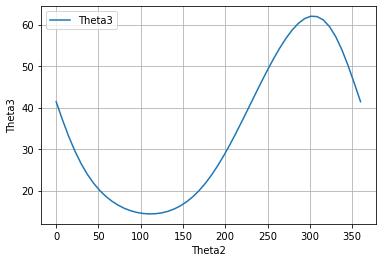

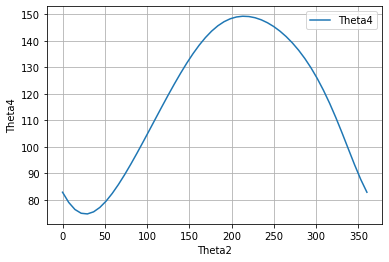

In [25]:
plt.figure()
plt.plot(np.rad2deg(th2_v),np.rad2deg(th3_v))
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2_v),np.rad2deg(th4_v))
plt.legend(["Theta4"])
plt.xlabel("Theta2")
plt.ylabel("Theta4")
plt.grid()